In [1]:
import numpy as np

with np.load("../assets/weather_data.npz") as weather:
    rain = weather["rain"]
    uk_mask = weather["uk"]
    irl_mask = weather["ireland"]
    spain_mask = weather["spain"]

In [2]:
np.mean(rain)

0.003113156467013889

This is very small since it's in metres, so let's convert it into mm:

In [3]:
rain *= 1000

In [4]:
np.mean(rain)

3.113156467013889

In [5]:
np.max(rain)

49.13330078125

In [6]:
np.min(rain)

0.0

Let's explore the mask arrays

In [7]:
uk_mask.dtype

dtype('bool')

In [8]:
uk_mask.shape

(75, 75)

This is the same as the `rain` array:

In [9]:
rain.shape

(75, 75)

So lets's combine them in one figure:

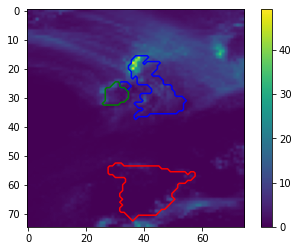

In [10]:
import matplotlib.pyplot as plt

# rain map as before for the temperature 
fig, ax = plt.subplots()
im = ax.imshow(rain)
fig.colorbar(im)

# add the individual masks to the axis (we add one contour line at 0.5, making use of False = 0 and True = 1)
ax.contour(uk_mask, colors="b", levels = [0.5])
ax.contour(irl_mask, colors="g", levels = [0.5])
ax.contour(spain_mask, colors="r", levels = [0.5])

What filtering method to use:
- Using `[]` will lose the original shape, but since we're averaging the whole thing that doesn't matter
- Using `np.where` will be tricky as if we fill the masked-out areads with `0` then it will skew the mean
- Using `masked_array` would work fine

For questions like this, using `[]` is often simplest:

In [11]:
uk_rain = rain[uk_mask]

In [12]:
np.mean(uk_rain)

7.5836526862097005

In [13]:
np.mean(rain[irl_mask])

4.611112633529975

In [14]:
np.mean(rain[spain_mask])

0.8478509374411709

The UK has the highest rainfall, followed by Ireland, followed by Spain.

This is a very simple exercise to get used to working with masked, multi-dimensional NumPy arrays. One problem is that we are calculating area means, but we are neglecting the fact that each grid point in our data is not representing the same area, but rather the same latitude and longitude increments. Therefore, grid points at higher latitudes actually represent a smaller area than those at lower latitudes. We will see how to correct for this and calculate a weighted area mean in a future exercise.